# Daily Average Temperatures - Time Series Analysis

#### Description of the data:

**A dataset on the average daily temperature (°F) of major cities in the world**

#### Objective: To analyse the time series data and forecast temperatures
**Models used: LSTM, Seasonal ARIMA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
import datetime

## Exploratory Data Analysis

**Reading data and printing the first five rows**

In [2]:
df = pd.read_csv('../input/daily-temperature-of-major-cities/city_temperature.csv',low_memory=False)
df.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


**Dropping any duplicate rows and checking for Null values**

In [3]:
df = df.drop_duplicates()
df.isnull().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

**State column has many null values. That is okay in the scope of the current analysis**

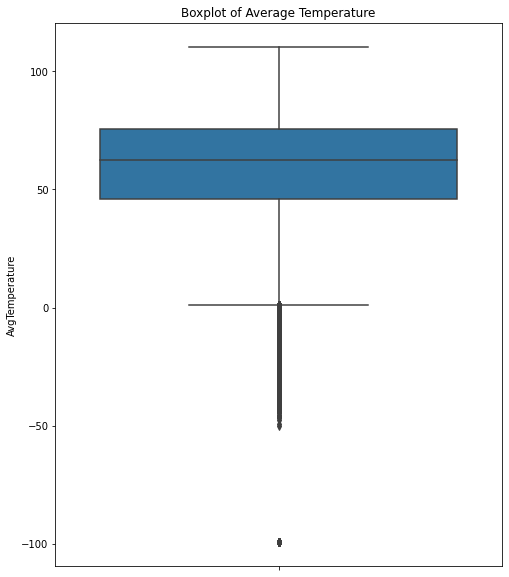

In [4]:
plt.figure(figsize = (8,10))
sns.boxplot(data = df,y = 'AvgTemperature')
_=plt.title("Boxplot of Average Temperature")

**Outliers are present and can be seen in the figure above. Let's choose all the rows having *'AvgTemperature'* greater than -70°F** 

In [5]:
df = df[df['AvgTemperature']>-70]

**Let's check the range of Year-Month-Day in the dataset**

In [6]:
df.sort_values(['Year','Month','Day'])

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
13809,Africa,Benin,NaN,Cotonou,1,1,1995,81.2
23075,Africa,Central African Republic,NaN,Bangui,1,1,1995,75.3
32341,Africa,Congo,NaN,Brazzaville,1,1,1995,79.9
41606,Africa,Egypt,NaN,Cairo,1,1,1995,59.2
...,...,...,...,...,...,...,...,...
2862479,North America,US,Wisconsin,Green Bay,5,13,2020,38.5
2871744,North America,US,Wisconsin,Madison,5,13,2020,45.7
2881009,North America,US,Wisconsin,Milwaukee,5,13,2020,41.2
2890274,North America,US,Wyoming,Casper,5,13,2020,54.1


**The data spans from Jan 1995 to May 2020**

**Since 2020 is incomplete, let's strip it off for the current analysis**

In [7]:
df = df[df['Year']<2020]

### Average temperature of the world over the years 1995 to 2019

In [8]:
data = df[['Year','AvgTemperature']].groupby('Year').mean()
linfit = np.polyfit(data.index,data['AvgTemperature'],deg=1)
linfit = linfit[0]*data.index + linfit[1]

fig = px.line(data,title='Average Temperature of the World from 1995 to 2019')
fig.add_trace(go.Scatter(x=data.index,y=linfit,name='Linear Fit'))

**The overall trend of average temperature increases due to global warming**

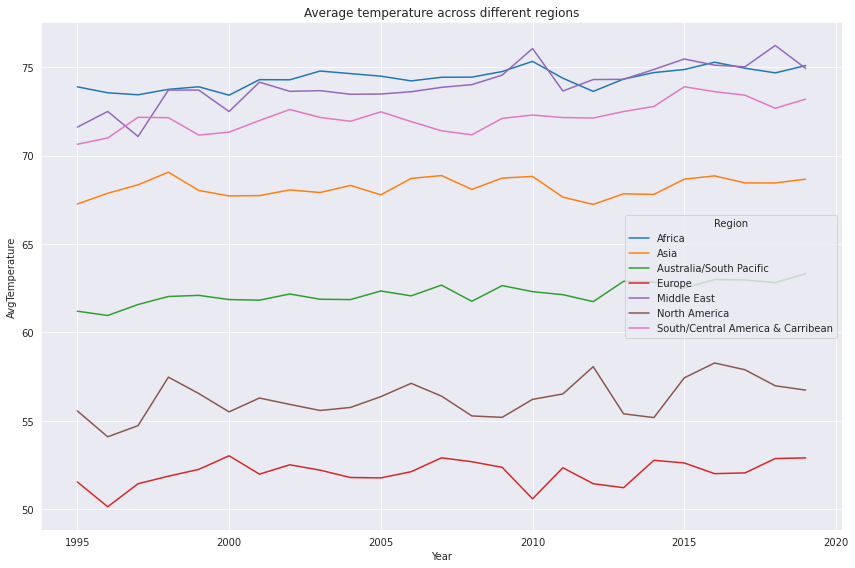

In [9]:
data = df[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()
data = data.reset_index(level=0)

#plotting
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data,hue='Region',x='Year',y='AvgTemperature')
_=plt.title('Average temperature across different regions')
plt.tight_layout()

**Plot above shows the average temperatures labelled by region. Africa and Middle east are the hottest regions, and europe is the coldest.**

### Plot - Yearly average temperature graphs for different regions

In [10]:
#Preparing data
data = df[['Region','Month','AvgTemperature']]
data = data.groupby(['Region','Month']).mean()

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:"Dec"}
data = data.reset_index(level=1)

#Changing the month label from integer to name
data['Month'] = data.loc[:,'Month'].map(months)
data.head(3)

,Month,AvgTemperature
Region,,
Africa,Jan,72.540331
Africa,Feb,73.689526
Africa,Mar,74.704641


In [11]:
#plotting
regions = df['Region'].unique()
plot_holder = []
colors = ['green','red','firebrick','blue','teal','black','orange']
for i,region in enumerate(regions):
    plot = go.Bar(x=data.loc[region,'Month'],y=data.loc[region,'AvgTemperature'],name=region,visible = (i==0),marker_color=colors[i])
    plot_holder.append(plot)
fig = go.Figure(data = plot_holder)

buttons = [dict(label=region,method='update',args=[{'title':region,'visible':[True if j==i else False for j in range(len(regions))]}]) for i,region in enumerate(regions)]
updatemenus = list([
    dict(
    buttons=buttons,
    yanchor='top',
    xanchor='left')
])
fig.update_layout(updatemenus=updatemenus)

**Africa and central america has nearly the same average temperature throught the year, Australia shows a reverse trend than others.**

**Let's display the highest and lowest recorded temperature in this dataset (1995 to 2020)**

In [12]:
data1=df.sort_values(by=['AvgTemperature'],ascending=False).head(1)
data2=df.sort_values(by=['AvgTemperature'],ascending=True).head(1)
data = pd.concat([data1,data2],)
data.index = ['Highest','Lowest']
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Highest,Middle East,Kuwait,NaN,Kuwait,8,1,2012,110.0
Lowest,North America,US,Alaska,Fairbanks,12,31,1999,-50.0


In [13]:
px.scatter_geo(lat=[29.3117,64.8378],lon=[29.3117,147.7164],text=['Kuwait','Fairbanks'],size=[0.5,0.5],color=[110,-50],color_continuous_scale='bluered')

**Kuwait on 1st August 2012 recorded the highest temperature of 110°F and Fairbanks on 31st December 1999 recorded the lowest.** 

### Top 5 coldest and hottest countries overall

In [14]:
data = df[['Country','AvgTemperature']].groupby('Country').mean().sort_values('AvgTemperature')
print('The top five coldest countries in the world are: ',data.index[:5].to_list())
print('The top five hottest countries in the world are: ',data.index[-5:].to_list())

The top five coldest countries in the world are:  ['Mongolia', 'Iceland', 'Norway', 'Canada', 'Finland']
The top five hottest countries in the world are:  ['Guyana', 'Indonesia', 'Thailand', 'Nigeria', 'Haiti']


**Plot - Top five coldest countries over the years**

In [15]:
data = df[['Country','Year','AvgTemperature']].groupby(['Year','Country']).mean().sort_values('AvgTemperature').reset_index()
data = data.groupby('Year').apply(lambda group: group.iloc[:5]).reset_index(drop=True)
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AvgTemperature',animation_frame='Year',title="Top five coldest countries over the years")

**Plot - Top five hottest countries over the years**

In [16]:
data = df[['Country','Year','AvgTemperature']].groupby(['Year','Country']).mean().sort_values('AvgTemperature',ascending=False).reset_index()
data = data.groupby('Year').apply(lambda group: group.iloc[:5]).reset_index(drop=True)
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AvgTemperature',animation_frame='Year',title="Top five hottest countries over the years")

### Choropleth plot of countrywise average temperature over the years 1995 to 2019

In [17]:
data = df[['Country','Year','AvgTemperature']].groupby(['Country','Year']).mean().reset_index()
px.choropleth(data_frame=data,locations="Country",locationmode='country names',animation_frame="Year",color='AvgTemperature',color_continuous_scale = 'Turbo',title="Choropleth plot of countrywise average temperature over the years 1995 to 2019")

### Let's narrow the analysis to Mumbai city in India

**Selecting data points of mumbai city**

In [18]:
data = df[df['Country'] == 'India']
bom = data.loc[data['City'] == 'Bombay (Mumbai)',['Month','Day','Year','AvgTemperature']].reset_index(drop=True)
bom.head(3)

,Month,Day,Year,AvgTemperature
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3


**Let's check if the temperature is recorded every day properly**

In [19]:
size = bom.groupby(['Year','Month']).size().reset_index()
size_max = size[0].max()
size_min = size[0].min()
n = size_max - size_min +1
cmap = sns.color_palette("deep",n)
size = size.pivot(index='Year',columns='Month',values=0)
size.head(3)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1995,31,28,30,30,31,30,31,31,30,31,30,31
1996,31,29,31,30,31,30,31,31,30,31,30,31
1997,31,28,31,30,31,30,31,31,30,31,30,31


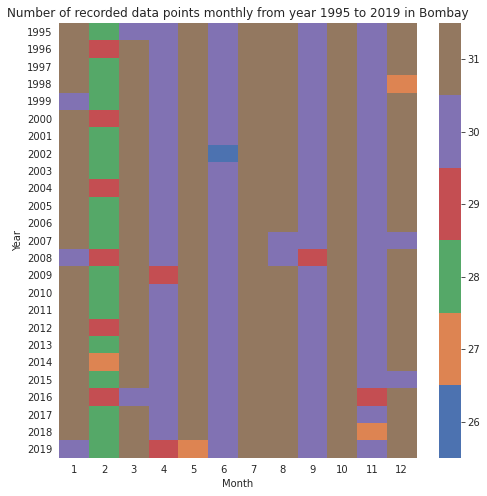

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(size,cmap=cmap)
_=plt.title('Number of recorded data points monthly from year 1995 to 2019 in Bombay')
colorbar = plt.gca().collections[0].colorbar

r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + (r/n*(i+0.5)) for i in range(n)])
colorbar.set_ticklabels(range(size_min,size_max+1))

**February column (Month = 2) shows leap years, but in certain other months, you can see the color mismatches. This is because some data is missing for that particular month**

**Let's create a datetime column and drop the month, year and day column** 

In [21]:
bom['Date'] = bom[['Year','Month','Day']].apply(lambda row:'-'.join([str(row['Year']),str(row['Month']),str(row['Day'])]),axis=1)
bom['Date'] = pd.to_datetime(bom['Date'])
bom = bom.drop(columns=['Month','Day','Year']).set_index('Date')
bom.head(3)

,AvgTemperature
Date,
1995-01-01,71.8
1995-01-02,72.0
1995-01-03,70.3


### Plot of average temperature of the city of mumbai (1995-2019)

In [22]:
px.line(data_frame=bom,color_discrete_sequence=['grey'],title="Daily Average Temperature - Bombay (1995-2019)")

### Rolling Statistics

In [23]:
roll_mean = bom.rolling(window=31).mean()
roll_mean2 = bom.rolling(window=365).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=bom.index,y=bom['AvgTemperature'],marker=dict(color='grey'),name='Daily'))
fig.add_trace(go.Scatter(x=roll_mean.index,y=roll_mean['AvgTemperature'],marker=dict(color='red'),name='31DaysRolling'))
fig.add_trace(go.Scatter(x=roll_mean2.index,y=roll_mean2['AvgTemperature'],marker=dict(color='green'),name='365DaysRolling'))
fig.update_layout(dict(title='Rolling Mean'))

In [24]:
roll_mean = bom.rolling(window=31).std()
roll_mean2 = bom.rolling(window=365).std()
fig = go.Figure()
fig.add_trace(go.Scatter(x=roll_mean.index,y=roll_mean['AvgTemperature'],marker=dict(color='red'),name='31DaysRolling'))
fig.add_trace(go.Scatter(x=roll_mean2.index,y=roll_mean2['AvgTemperature'],marker=dict(color='green'),name='365DaysRolling'))
fig.update_layout(dict(title='Rolling Std'))

## Seasonal Decompose

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

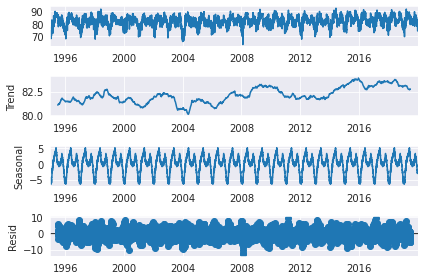

In [26]:
decompose = seasonal_decompose(bom,period=365)
decompose.plot();

### Dickey Fuller Test
**Let's perform a Dickey Fuller test to verify the stationarity**

**Null hypothesis: The time series data is non stationary**

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adf = adfuller(x=bom['AvgTemperature'])
print('pvalue:',adf[1])
print('adf:',adf[0])
print('usedlag:',adf[2])
print('nobs:',adf[3])
print('critical_values:',adf[4])
print('icbest:',adf[5])

pvalue: 8.043434022165226e-16
adf: -9.35627875938995
usedlag: 36
nobs: 9065
critical_values: {'1%': -3.4310715833098833, '5%': -2.8618588932772657, '10%': -2.5669397418503186}
icbest: 33873.287352081155


**The pvalue is very small, close to 0. Hence we can reject our null hypothesis. The data is stationary**

## LSTM Model Creation

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

**Train - Test - Split: Choosing 2019 data for testing and remaining for training**

In [30]:
test = bom[bom.index>'2019']
train = bom[bom.index<'2019']

**Scaling train data and test data for LSTM Input**

In [31]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [32]:
time_steps = 20
features = 1

train_gen = TimeseriesGenerator(train,train,time_steps,batch_size=32)
test_gen = TimeseriesGenerator(test,test,time_steps,batch_size=32)

**Defining a sequential model**

In [33]:
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(time_steps,features),return_sequences=True))
model.add(LSTM(32,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


**Defining Callbacks**

In [34]:
early_stop = EarlyStopping(patience=5)

**Fitting the model**

In [35]:
model.fit(x=train_gen,epochs=40,callbacks=[early_stop],validation_data=test_gen)

#Save the model
model.save('LSTMAvgTemp.h5')

Epoch 1/40
273/273 [==============================] - 12s 31ms/step - loss: 0.0729 - val_loss: 0.0064
Epoch 2/40
273/273 [==============================] - 8s 31ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 3/40
273/273 [==============================] - 8s 29ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 4/40
273/273 [==============================] - 8s 28ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 5/40
273/273 [==============================] - 7s 26ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 6/40
273/273 [==============================] - 6s 24ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 7/40
273/273 [==============================] - 6s 22ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/40
273/273 [==============================] - 6s 21ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 9/40
273/273 [==============================] - 6s 21ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 10/40
273/273 [==============================] - 5s 20ms/step - loss: 0.0032 - val_l

**Let's input X values in the test generator to the model and collect it's predictions**

**Let's also collect the original targets from the test generator**

In [36]:
predict = model.predict(test_gen)
test_targets = test_gen.targets[test_gen.start_index:test_gen.end_index+1]

**Let's inverse transform the scaled results**

In [37]:
predict = scaler.inverse_transform(predict).ravel()
test_targets = scaler.inverse_transform(test_targets).ravel()

## Model Evaluation

**The predictions of the model for the year 2019 are plotted with the actual target values of 2019**

In [38]:
from sklearn.metrics import mean_squared_error

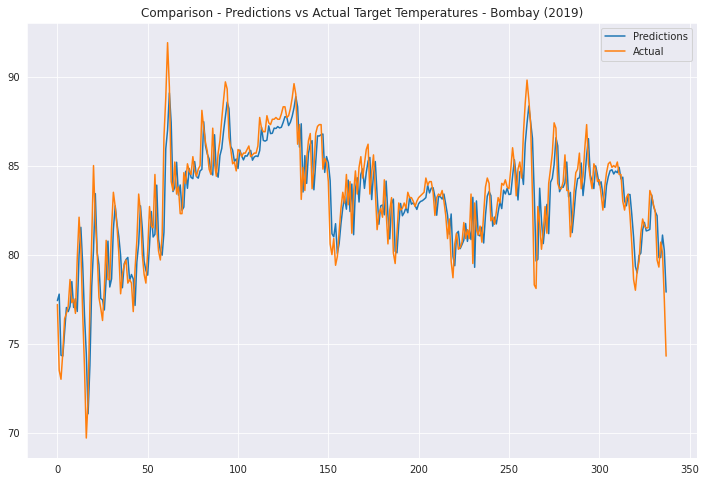

In [39]:
_,ax=plt.subplots(1,1,figsize=(12,8))
sns.lineplot(x=range(len(predict)),y=predict,ax=ax,label='Predictions')
sns.lineplot(x=range(len(test_targets)),y=test_targets,ax=ax,label='Actual')
plt.legend()
_=plt.title('Comparison - Predictions vs Actual Target Temperatures - Bombay (2019)')

In [40]:
print('The RMSE Score is:',format(np.sqrt(mean_squared_error(predict,test_targets)),'.2f'))

The RMSE Score is: 1.50


## Forecasting beyond 2019

**Select the last 'time_steps' values of average temperature from test data. It can be used to forecast further.**

In [41]:
data = bom.iloc[-time_steps:].to_numpy() #2D Array
data = scaler.transform(data)

#expand to include batch dimension
data = np.expand_dims(data,0)

#record the last date of observartion from the data
date = bom.index[-1]

date_store = bom.iloc[-time_steps:].index.to_list()

#forecasting
forecasts=10
for i in range(forecasts):
    predicted = model.predict(data[:,-20:,:])
    date = date+datetime.timedelta(days=1)
    data = np.append(data,[predicted],axis=1)
    date_store.append(date)
data = scaler.inverse_transform(data.reshape(1,-1))
forecast_df = pd.DataFrame(index=date_store[time_steps-1:],data={'AvgTemperature':data.ravel()[time_steps-1:]})

**Let's print and plot the forecast_df**

**The first datapoint in forecast_df is not predicted. It is borrowed from the given data to ensure continuity while plotting**

In [42]:
forecast_df

,AvgTemperature
2019-12-31,74.300000
2020-01-01,75.277895
2020-01-02,76.547887
2020-01-03,77.446512
2020-01-04,77.888173
2020-01-05,78.061179
2020-01-06,78.143650
2020-01-07,78.212562
2020-01-08,78.289560
2020-01-09,78.375911


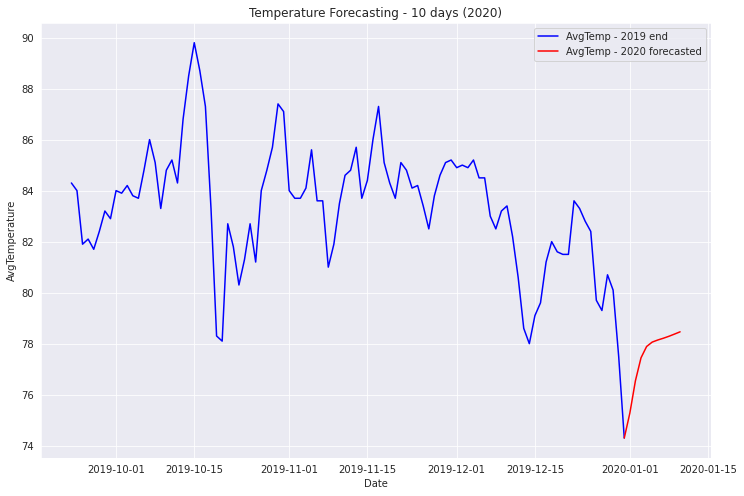

In [43]:
_,ax=plt.subplots(1,1,figsize=(12,8))
sns.lineplot(data=bom.iloc[-100:,:],y='AvgTemperature',x=bom.iloc[-100:,:].index,color='blue',ax=ax,label='AvgTemp - 2019 end')
sns.lineplot(data=forecast_df,y='AvgTemperature',x=forecast_df.index,color='red',ax=ax,label= 'AvgTemp - 2020 forecasted')
_=plt.title(f'Temperature Forecasting - {forecasts} days (2020)')

## Seasonal ARIMA Model

In [44]:
!pip3 install -q pmdarima
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta

**The data should be downsampled to train the Seasonal ARIMA model faster. So here we are downsampling the data from daily to monthly frequency. If downsampling is not performed, the model created will be very huge in this case**

In [45]:
bom_monthly = bom.resample('M').mean()
bom_monthly.head(5)

,AvgTemperature
Date,
1995-01-31,72.393548
1995-02-28,76.214286
1995-03-31,79.393333
1995-04-30,84.120000
1995-05-31,86.819355


In [46]:
data =[go.Scatter(x=bom.index,y=bom['AvgTemperature'],name='AvTemperature-Daily',marker=dict(color='grey')),go.Scatter(x= bom_monthly.index,y=bom_monthly['AvgTemperature'],name='AvgTemperature-Monthly',marker=dict(color='red'))]
fig = go.Figure(data)

buttons = [dict(label='Both',method='restyle',args=[{'visible':[True,True]}]),
           dict(label='Daily',method='restyle',args=[{'visible':[True,False]}]),
           dict(label='Monthly',method='restyle',args=[{'visible':[False,True]}])]

updatemenus=[dict(type="buttons",direction='down',buttons=buttons)]
fig.update_layout(updatemenus=updatemenus,title='Average Temperature - Daily and Monthly - Bombay')

**The auto arima function can automatically determine arima parameters and model**

**The data is seasonal with the frequency of 12 months**

In [47]:
#using default auto_arima arguments
model = auto_arima(bom_monthly,seasonal=True,m=12)

**Storing date and temperature of the last row so that forecast plot can be made continuous**

In [48]:
date = bom_monthly.index[-1]
last_val = bom_monthly.iloc[-1].to_numpy()

**Forecasting for the first 5 months in 2020**

In [49]:
forecasts=5
date_store = [(date + relativedelta(months=i)) for i in range(0,forecasts+1)]

predict = model.predict(forecasts)
predict =  np.append(last_val,predict)
forecast_df = pd.DataFrame(data=predict,index=date_store,columns=['AvgTemperature'])
forecast_df.head(5)

,AvgTemperature
2019-12-31,81.635484
2020-01-31,79.518710
2020-02-29,80.583247
2020-03-31,83.056672
2020-04-30,85.841799


**Plotting results**

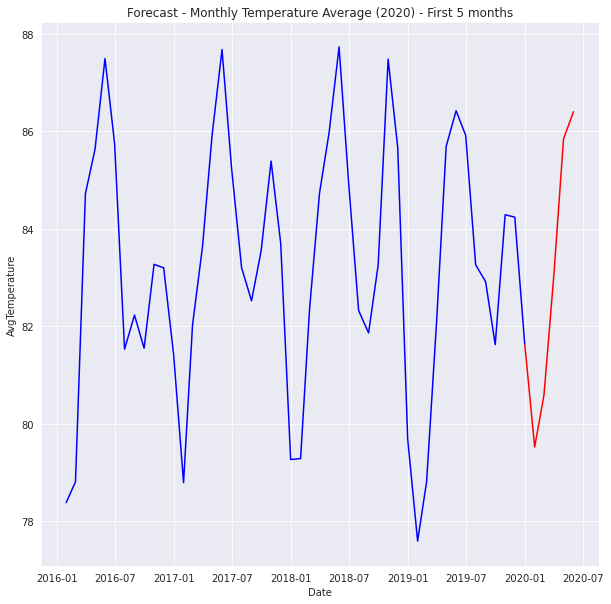

In [50]:
_,ax=plt.subplots(1,1,figsize=(10,10))
sns.lineplot(data=forecast_df['AvgTemperature'],ax=ax,color='red')
sns.lineplot(data=bom_monthly['AvgTemperature'][-4*12:],ax=ax,color='blue')
_=plt.title(f'Forecast - Monthly Temperature Average (2020) - First {forecasts} months')

# Thank You